In [1]:
import cv2
import numpy as np

image_path = "/content/sample_data/human-face-4.jpg"
image = cv2.imread(image_path)

In [2]:
height, width, channels = image.shape
print(f"Image size: Width={width}, Height={height}, Channels={channels}")

Image size: Width=2000, Height=1333, Channels=3


In [3]:
total_pixels = height * width
print(f"Total number of pixels: {total_pixels}")

Total number of pixels: 2666000


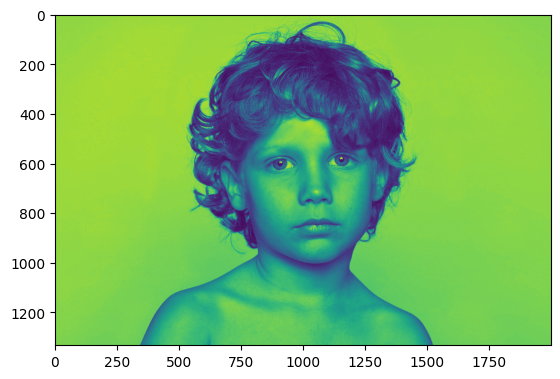

In [4]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(grayscale_image)

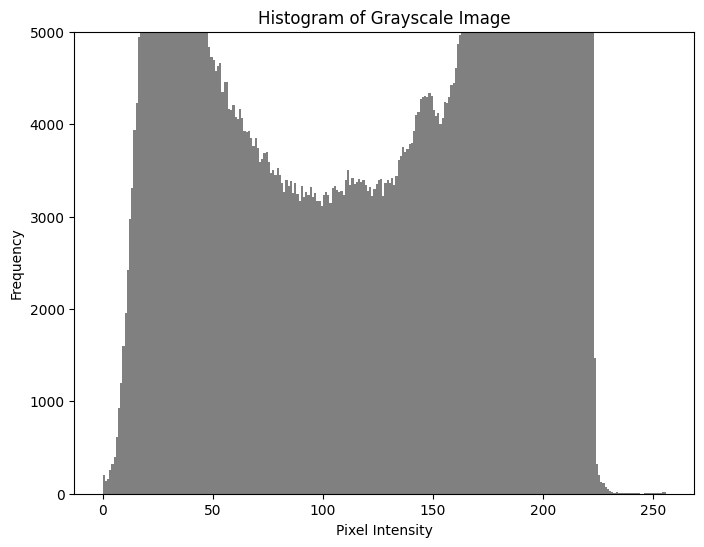

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(grayscale_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title("Histogram of Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.ylim(0, 5000)
plt.show()

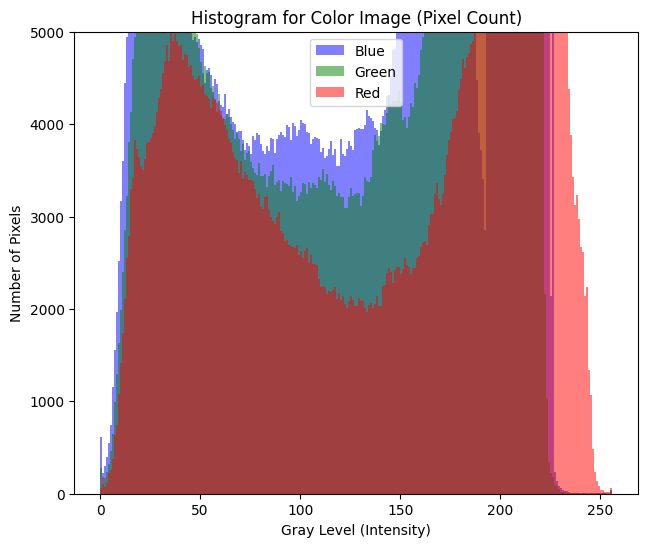

In [6]:
blue_channel, green_channel, red_channel = cv2.split(image)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(blue_channel.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.5, label='Blue')
plt.hist(green_channel.ravel(), bins=256, range=(0, 256), color='green', alpha=0.5, label='Green')
plt.hist(red_channel.ravel(), bins=256, range=(0, 256), color='red', alpha=0.5, label='Red')
plt.title("Histogram for Color Image (Pixel Count)")
plt.xlabel("Gray Level (Intensity)")
plt.ylabel("Number of Pixels")
plt.ylim(0, 5000)
plt.legend()

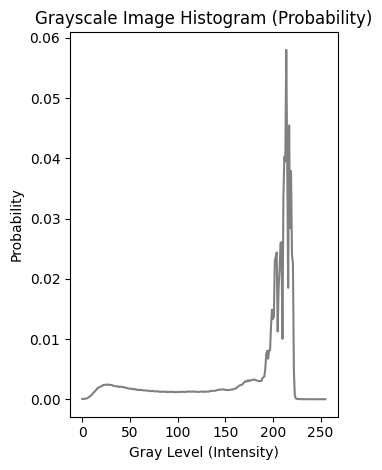

In [7]:
#Using M2
plt.subplot(1, 2, 2)
gray_hist = cv2.calcHist([grayscale_image], [0], None, [256], [0, 256])
probability = gray_hist / gray_hist.sum()
plt.plot(probability, color='gray')
plt.title("Grayscale Image Histogram (Probability)")
plt.xlabel("Gray Level (Intensity)")
plt.ylabel("Probability")

plt.tight_layout()
plt.show()


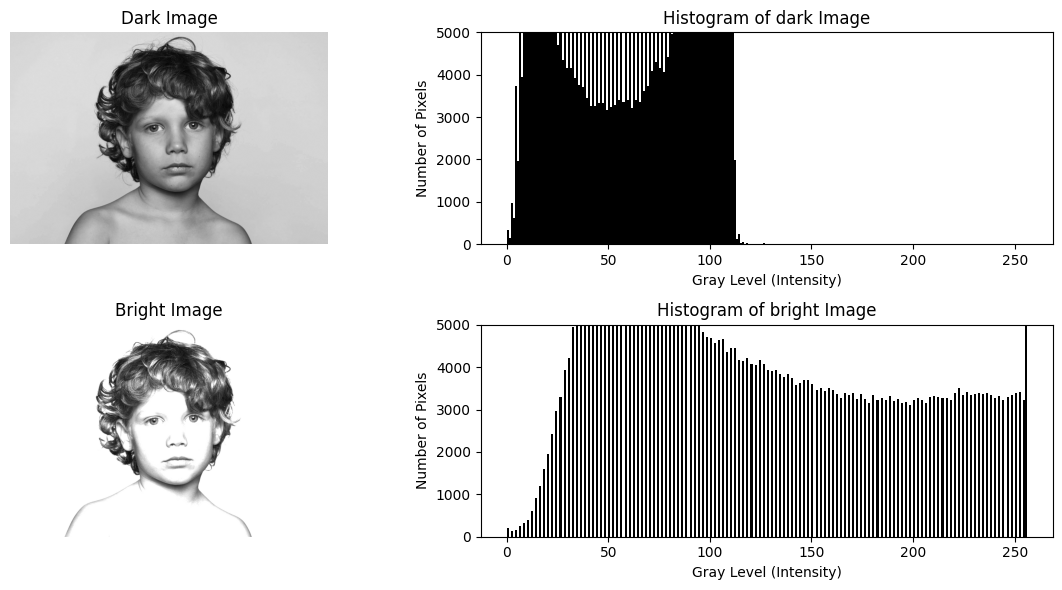

In [8]:
dark_image = cv2.convertScaleAbs(grayscale_image, alpha=0.5, beta=0)  # alpha < 1 for darkening

# Create the bright image by multiplying pixel values by a factor greater than 1
bright_image = cv2.convertScaleAbs(grayscale_image, alpha=2.0, beta=0)  # alpha > 1 for brightening

# Plotting the original, dark, and bright images

plt.figure(figsize=(12, 6))

# Dark Image
plt.subplot(2, 2, 1)
plt.imshow(dark_image, cmap='gray')
plt.title("Dark Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(dark_image.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histogram of dark Image")
plt.xlabel("Gray Level (Intensity)")
plt.ylabel("Number of Pixels")
plt.ylim(0, 5000)

# Bright Image
plt.subplot(2, 2, 3)
plt.imshow(bright_image, cmap='gray')
plt.title("Bright Image")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(bright_image.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histogram of bright Image")
plt.xlabel("Gray Level (Intensity)")
plt.ylabel("Number of Pixels")
plt.ylim(0, 5000)

plt.tight_layout()
plt.show()

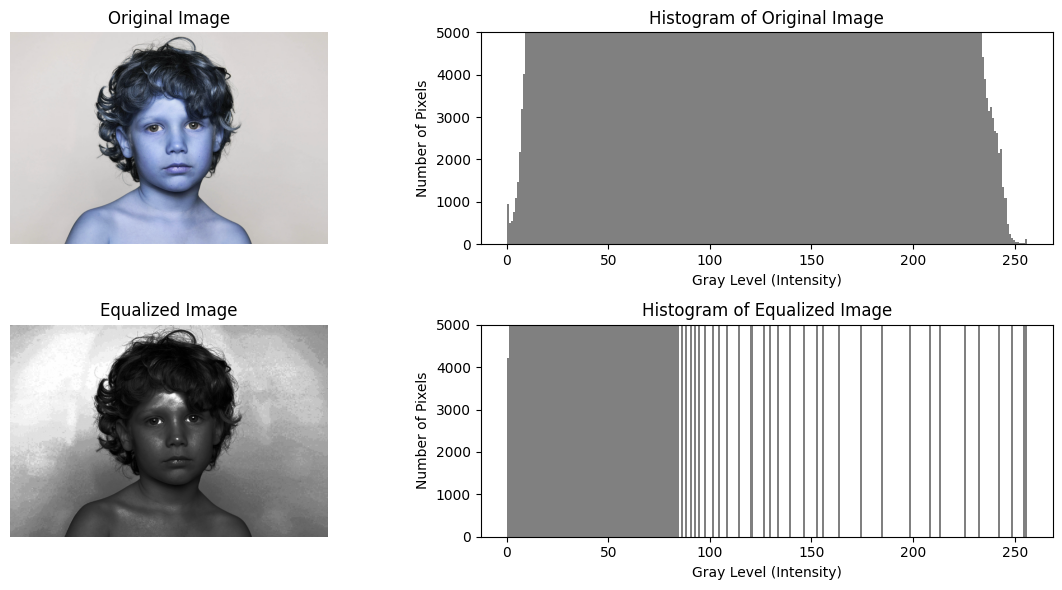

In [9]:
equalized_image = cv2.equalizeHist(grayscale_image)

plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Histogram of Original Image
plt.subplot(2, 2, 2)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title("Histogram of Original Image")
plt.xlabel("Gray Level (Intensity)")
plt.ylabel("Number of Pixels")
plt.ylim(0, 5000)


# Equalized Image
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

# Histogram of Equalized Image
plt.subplot(2, 2, 4)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title("Histogram of Equalized Image")
plt.xlabel("Gray Level (Intensity)")
plt.ylabel("Number of Pixels")
plt.ylim(0, 5000)


plt.tight_layout()
plt.show()

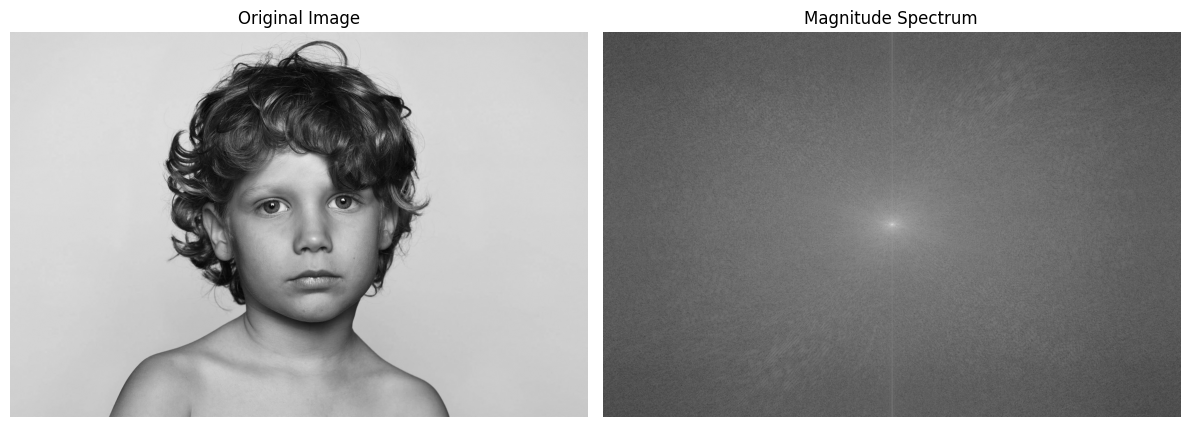

In [10]:
dft = cv2.dft(np.float32(grayscale_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)
magnitude_spectrum = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])
log_magnitude_spectrum = np.log(1 + magnitude_spectrum)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(log_magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

plt.tight_layout()
plt.show()

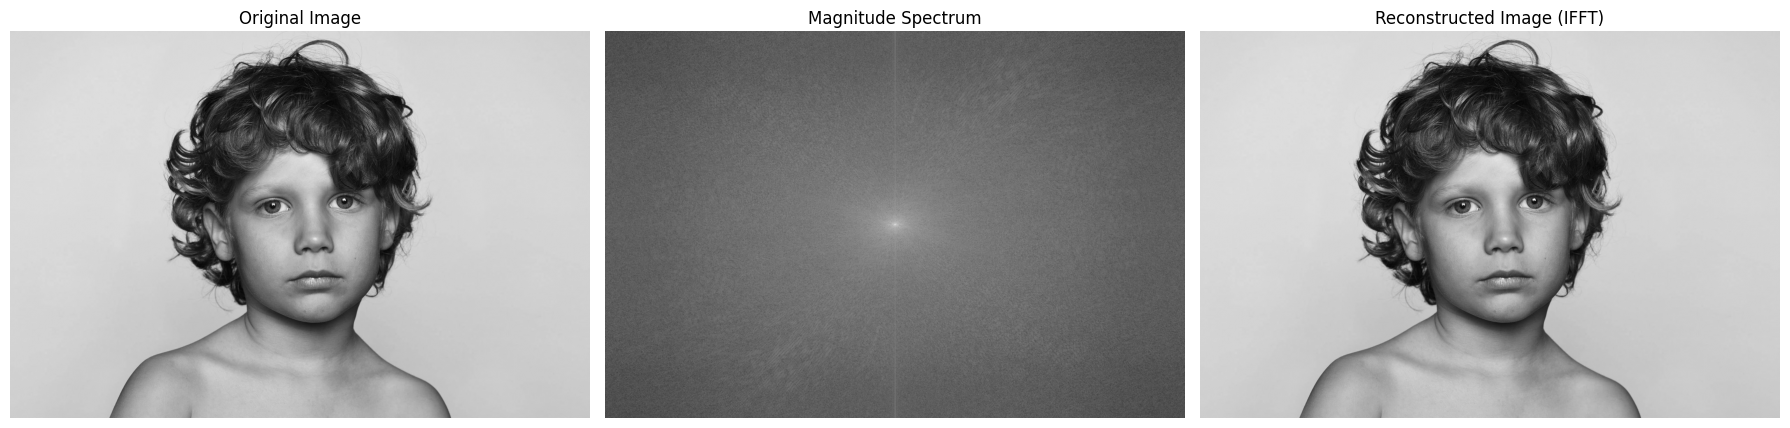

In [11]:
dft = cv2.dft(np.float32(grayscale_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)
magnitude_spectrum = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])
log_magnitude_spectrum = np.log(1 + magnitude_spectrum)
dft_ishifted = np.fft.ifftshift(dft_shifted)
image_reconstructed = cv2.idft(dft_ishifted)
image_reconstructed = cv2.magnitude(image_reconstructed[:, :, 0], image_reconstructed[:, :, 1])

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(log_magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_reconstructed, cmap='gray')
plt.title("Reconstructed Image (IFFT)")
plt.axis('off')

plt.tight_layout()
plt.show()

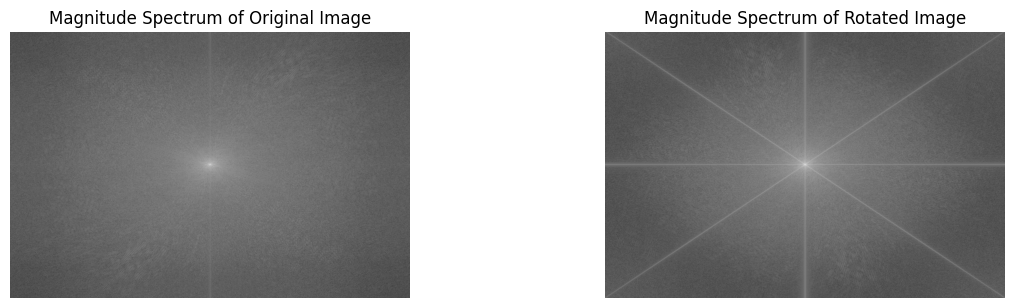

In [12]:
#rotating imae
angle = 45
center = (grayscale_image.shape[1] // 2, grayscale_image.shape[0] // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(grayscale_image, rotation_matrix, (grayscale_image.shape[1], grayscale_image.shape[0]))


dft_original = cv2.dft(np.float32(grayscale_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted_original = np.fft.fftshift(dft_original)
magnitude_spectrum_original = cv2.magnitude(dft_shifted_original[:, :, 0], dft_shifted_original[:, :, 1])
log_magnitude_spectrum_original = np.log(1 + magnitude_spectrum_original)

dft_rotated = cv2.dft(np.float32(rotated_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted_rotated = np.fft.fftshift(dft_rotated)
magnitude_spectrum_rotated = cv2.magnitude(dft_shifted_rotated[:, :, 0], dft_shifted_rotated[:, :, 1])
log_magnitude_spectrum_rotated = np.log(1 + magnitude_spectrum_rotated)

plt.figure(figsize=(18, 6))

# Magnitude Spectrum of Original Image
plt.subplot(2, 3, 1)
plt.imshow(log_magnitude_spectrum_original, cmap='gray')
plt.title("Magnitude Spectrum of Original Image")
plt.axis('off')

# Magnitude Spectrum of Rotated Image
plt.subplot(2, 3, 2)
plt.imshow(log_magnitude_spectrum_rotated, cmap='gray')
plt.title("Magnitude Spectrum of Rotated Image")
plt.axis('off')

plt.tight_layout()
plt.show()